# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
        InvoiceNo StockCode                         Description  Quantity  \
count   541909.00    541909                              540455 541909.00   
unique   25900.00      4070                                4223       nan   
top     573585.00    85123A  WHITE HANGING HEART T-LIGHT HOLDER       na

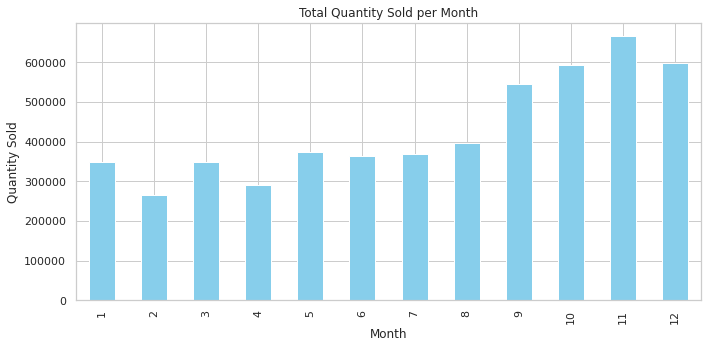

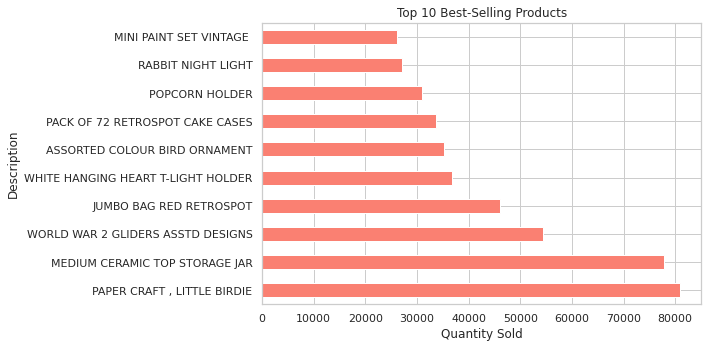

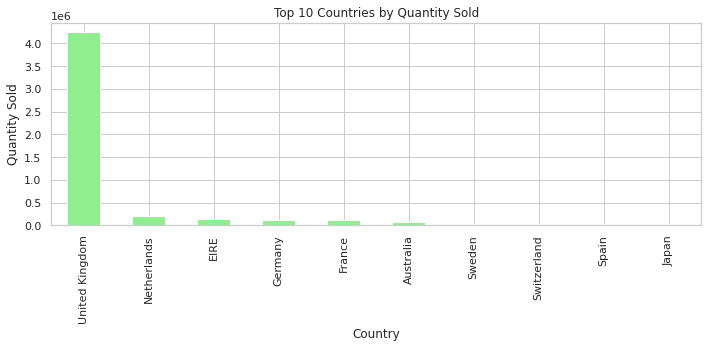

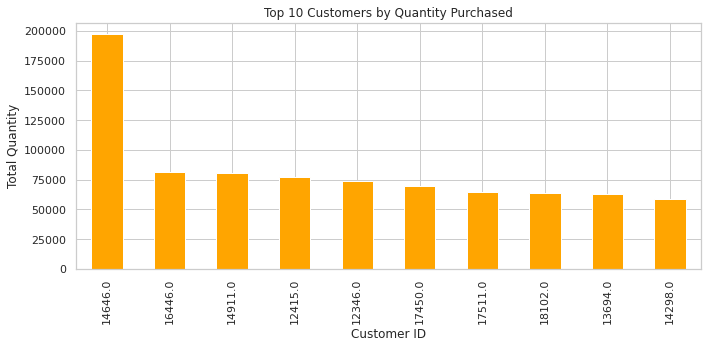

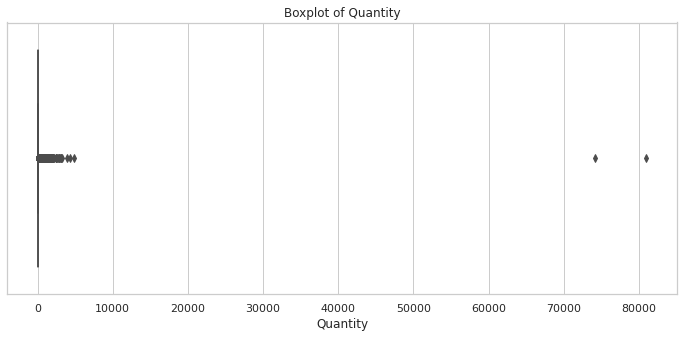

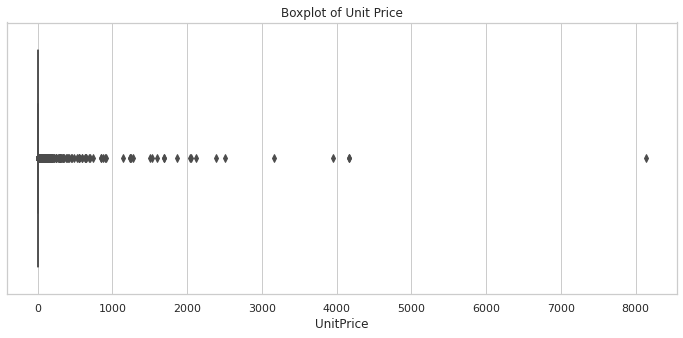


--- Key Insights ---
1. Busiest month in terms of sales: 11
2. Most sold product: PAPER CRAFT , LITTLE BIRDIE
3. Top country by quantity sold: United Kingdom

--- Recommendations ---
- Focus marketing efforts during peak months like November and December.
- Ensure stock availability of top-selling products.
- Consider customer loyalty programs for high-value customers.

--- Limitations ---
- Some data (e.g., CustomerID) is missing and was dropped, which may reduce accuracy.
- Future analysis could include customer segmentation or time-series forecasting.


In [6]:
# 1. Import Libraries and Load Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set display and style
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_excel("Online Retail.xlsx")
df.head()

# 2. Data Overview
print(df.info())
print(df.describe(include='all'))
print("Missing values:\n", df.isnull().sum())

# 3. Data Cleaning
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Remove negative quantities and unit prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Remove duplicates
df = df.drop_duplicates()

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 4. Feature Engineering
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

# 5. Exploratory Data Analysis

# a. Sales Trends Over Time
monthly_sales = df.groupby('Month')['Quantity'].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Quantity Sold per Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

# b. Top-Selling Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_products.plot(kind='barh', color='salmon')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.tight_layout()
plt.show()

# c. Country-wise Sales
country_sales = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
country_sales.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries by Quantity Sold')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

# d. Most Active Customers
top_customers = df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_customers.plot(kind='bar', color='orange')
plt.title('Top 10 Customers by Quantity Purchased')
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

# e. Outliers Detection
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot of Unit Price')
plt.show()

# 6. Summary of Key Insights
print("\n--- Key Insights ---")
print("1. Busiest month in terms of sales:", monthly_sales.idxmax())
print("2. Most sold product:", top_products.idxmax())
print("3. Top country by quantity sold:", country_sales.idxmax())

# 7. Recommendations
print("\n--- Recommendations ---")
print("- Focus marketing efforts during peak months like November and December.")
print("- Ensure stock availability of top-selling products.")
print("- Consider customer loyalty programs for high-value customers.")

# 8. Limitations & Next Steps
print("\n--- Limitations ---")
print("- Some data (e.g., CustomerID) is missing and was dropped, which may reduce accuracy.")
print("- Future analysis could include customer segmentation or time-series forecasting.")
